In [1]:
# pip install scikit-plot

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing 
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder #import function for label encoder
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from scikitplot.metrics import plot_roc_curve
from scikitplot.metrics import plot_confusion_matrix

%matplotlib inline
#plt.style.use('seaborn-white')
sns.set_style('whitegrid')

# Trick to widen the screen
from IPython.display import display, HTML

#Widens the code landscape 
display(HTML("<style>.container { width:98% !important; }</style>"))

pd.set_option('display.max_columns',500) #allows for up to 500 columns to be displayed when viewing a dataframe

import warnings
warnings.filterwarnings("ignore") 

### Reading in Datasets

In [3]:
# Reading in training data
train1 = pd.read_csv('train_FD001.txt',sep="\s+",header=None)

# Reading in test data
test1 = pd.read_csv('test_FD001.txt',sep="\s+",header=None)

In [4]:
# Reading in RUL data
RUL1 = pd.read_csv('RUL_FD001.txt',sep="\s+",header=None)

# Assigning "RUL" as column name
RUL1.columns = ["RUL"]
RUL1['unit'] = RUL1.index + 1

In [5]:
# Adding column names
columns = ["unit","cycles","op1","op2","op3","sensor1","sensor2","sensor3","sensor4","sensor5","sensor6","sensor7","sensor8","sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16","sensor17","sensor18","sensor19","sensor20","sensor21"]

train1.columns = columns
test1.columns = columns

In [6]:
print("Training Set 1: ",train1.shape)

print("Test Set 1: ",test1.shape)

print("RUL Set 1: ",RUL1.shape)

Training Set 1:  (20631, 26)
Test Set 1:  (13096, 26)
RUL Set 1:  (100, 2)


### Inspecting the Data

#### Training Dataset

In [7]:
print("Preview of 1st Training Set")
train1.head(20)

Preview of 1st Training Set


,unit,cycles,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
5,1,6,-0.0043,-0.0001,100.0,518.67,642.10,1584.47,1398.37,14.62,21.61,554.67,2388.02,9049.68,1.3,47.16,521.68,2388.03,8132.85,8.4108,0.03,391,2388,100.0,38.98,23.3669
6,1,7,0.0010,0.0001,100.0,518.67,642.48,1592.32,1397.77,14.62,21.61,554.34,2388.02,9059.13,1.3,47.36,522.32,2388.03,8132.32,8.3974,0.03,392,2388,100.0,39.10,23.3774
7,1,8,-0.0034,0.0003,100.0,518.67,642.56,1582.96,1400.97,14.62,21.61,553.85,2388.00,9040.80,1.3,47.24,522.47,2388.03,8131.07,8.4076,0.03,391,2388,100.0,38.97,23.3106
8,1,9,0.0008,0.0001,100.0,518.67,642.12,1590.98,1394.80,14.62,21.61,553.69,2388.05,9046.46,1.3,47.29,521.79,2388.05,8125.69,8.3728,0.03,392,2388,100.0,39.05,23.4066
9,1,10,-0.0033,0.0001,100.0,518.67,641.71,1591.24,1400.46,14.62,21.61,553.59,2388.05,9051.70,1.3,47.03,521.79,2388.06,8129.38,8.4286,0.03,393,2388,100.0,38.95,23.4694


In [8]:
train1.isna().sum()

unit        0
cycles      0
op1         0
op2         0
op3         0
sensor1     0
sensor2     0
sensor3     0
sensor4     0
sensor5     0
sensor6     0
sensor7     0
sensor8     0
sensor9     0
sensor10    0
sensor11    0
sensor12    0
sensor13    0
sensor14    0
sensor15    0
sensor16    0
sensor17    0
sensor18    0
sensor19    0
sensor20    0
sensor21    0
dtype: int64

In [9]:
# Checking to see if there are any duplicated values in any of the columns
print("Duplicated Values: ",train1.duplicated().sum())

Duplicated Values:  0


In [10]:
train1.describe().T

,count,mean,std,min,25%,50%,75%,max
unit,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
op1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
op2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
op3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor1,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
sensor2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
sensor3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
sensor4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
sensor5,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


In [11]:
# Find features that have no activity (std = 0)
dropTrainCol = (train1.nunique() == 1).loc[lambda x:x].index.tolist()
dropTrainCol

['op3', 'sensor1', 'sensor5', 'sensor10', 'sensor16', 'sensor18', 'sensor19']

In [12]:
# Drop the columns with no activity
train1 = train1.drop(columns = dropTrainCol)

In [13]:
train1.head()

,unit,cycles,op1,op2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044


#### Testing Dataset

In [14]:
print("Preview of 1st Test Set")
test1.head()

Preview of 1st Test Set


,unit,cycles,op1,op2,op3,sensor1,sensor2,sensor3,sensor4,sensor5,sensor6,sensor7,sensor8,sensor9,sensor10,sensor11,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130


In [15]:
test1.isna().sum()

unit        0
cycles      0
op1         0
op2         0
op3         0
sensor1     0
sensor2     0
sensor3     0
sensor4     0
sensor5     0
sensor6     0
sensor7     0
sensor8     0
sensor9     0
sensor10    0
sensor11    0
sensor12    0
sensor13    0
sensor14    0
sensor15    0
sensor16    0
sensor17    0
sensor18    0
sensor19    0
sensor20    0
sensor21    0
dtype: int64

In [16]:
print("Duplicated Values: ",test1.duplicated().sum())

Duplicated Values:  0


In [17]:
test1.describe().T

,count,mean,std,min,25%,50%,75%,max
unit,13096.0,51.543907,2.828942e+01,1.0000,28.0000,52.0000,76.0000,100.0000
cycles,13096.0,76.836515,5.305775e+01,1.0000,33.0000,69.0000,113.0000,303.0000
op1,13096.0,-0.000011,2.202685e-03,-0.0082,-0.0015,0.0000,0.0015,0.0078
op2,13096.0,0.000004,2.940306e-04,-0.0006,-0.0002,0.0000,0.0003,0.0007
op3,13096.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
sensor1,13096.0,518.670000,6.014263e-11,518.6700,518.6700,518.6700,518.6700,518.6700
sensor2,13096.0,642.475088,4.008993e-01,641.1300,642.1975,642.4600,642.7400,644.3000
sensor3,13096.0,1588.099204,5.003274e+00,1569.0400,1584.6000,1587.9900,1591.3625,1607.5500
sensor4,13096.0,1404.735362,6.688309e+00,1384.3900,1399.9500,1404.4400,1409.0500,1433.3600
sensor5,13096.0,14.620000,2.671743e-12,14.6200,14.6200,14.6200,14.6200,14.6200


In [18]:
dropTestCol = (test1.nunique() == 1).loc[lambda x:x].index.tolist()
print("Unactive Testing Columns: ",dropTestCol, "\n")
print("Unactive Training Columns: ",dropTrainCol)

Unactive Testing Columns:  ['op3', 'sensor1', 'sensor5', 'sensor10', 'sensor16', 'sensor18', 'sensor19'] 

Unactive Training Columns:  ['op3', 'sensor1', 'sensor5', 'sensor10', 'sensor16', 'sensor18', 'sensor19']


In [19]:
test1 = test1.drop(columns = dropTestCol)
test1.head()

,unit,cycles,op1,op2,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor9,sensor11,sensor12,sensor13,sensor14,sensor15,sensor17,sensor20,sensor21
0,1,1,0.0023,0.0003,643.02,1585.29,1398.21,21.61,553.90,2388.04,9050.17,47.20,521.72,2388.03,8125.55,8.4052,392,38.86,23.3735
1,1,2,-0.0027,-0.0003,641.71,1588.45,1395.42,21.61,554.85,2388.01,9054.42,47.50,522.16,2388.06,8139.62,8.3803,393,39.02,23.3916
2,1,3,0.0003,0.0001,642.46,1586.94,1401.34,21.61,554.11,2388.05,9056.96,47.50,521.97,2388.03,8130.10,8.4441,393,39.08,23.4166
3,1,4,0.0042,0.0000,642.44,1584.12,1406.42,21.61,554.07,2388.03,9045.29,47.28,521.38,2388.05,8132.90,8.3917,391,39.00,23.3737
4,1,5,0.0014,0.0000,642.51,1587.19,1401.92,21.61,554.16,2388.01,9044.55,47.31,522.15,2388.03,8129.54,8.4031,390,38.99,23.4130


#### RUL Data

In [20]:
print("Preview of RUL Data")
RUL1.head()

Preview of RUL Data


,RUL,unit
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5


In [21]:
RUL1.isna().sum()

RUL     0
unit    0
dtype: int64

In [22]:
RUL1["RUL"].describe()

count    100.00000
mean      75.52000
std       41.76497
min        7.00000
25%       32.75000
50%       86.00000
75%      112.25000
max      145.00000
Name: RUL, dtype: float64

### Data Analysis

In [23]:
# Extra dataframes to analyze variables
train_attributes = train1.drop(columns = train1[["unit","cycles"]])
train_sensors = train1.drop(columns = train1[["unit","cycles","op1","op2"]])

<AxesSubplot:>

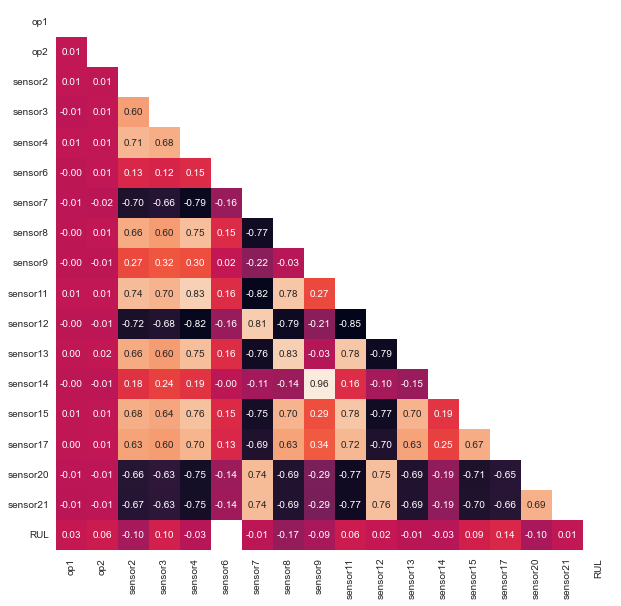

In [24]:
train_corr = train_attributes.copy()
train_corr["RUL"] = RUL1["RUL"]
train_corr.head()
fig = plt.figure(figsize=(10,10))
sns.heatmap(train_corr.corr(),annot=True,fmt='.2f',mask=np.triu(train_corr.corr()),cbar=False)

In [25]:
# As sensors 9 and 14 are highly correlated they will be dropped
train1 = train1.drop(columns = train1[['sensor9','sensor14']])
test1 = test1.drop(columns = test1[['sensor9','sensor14']])
train_attributes = train_attributes.drop(columns = train_attributes[['sensor9','sensor14']])
train_sensors = train_sensors.drop(columns = train_sensors[['sensor9','sensor14']])

train_sensors.head()

,sensor2,sensor3,sensor4,sensor6,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21
0,641.82,1589.70,1400.60,21.61,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190
1,642.15,1591.82,1403.14,21.61,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236
2,642.35,1587.99,1404.20,21.61,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442
3,642.35,1582.79,1401.87,21.61,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739
4,642.37,1582.85,1406.22,21.61,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044


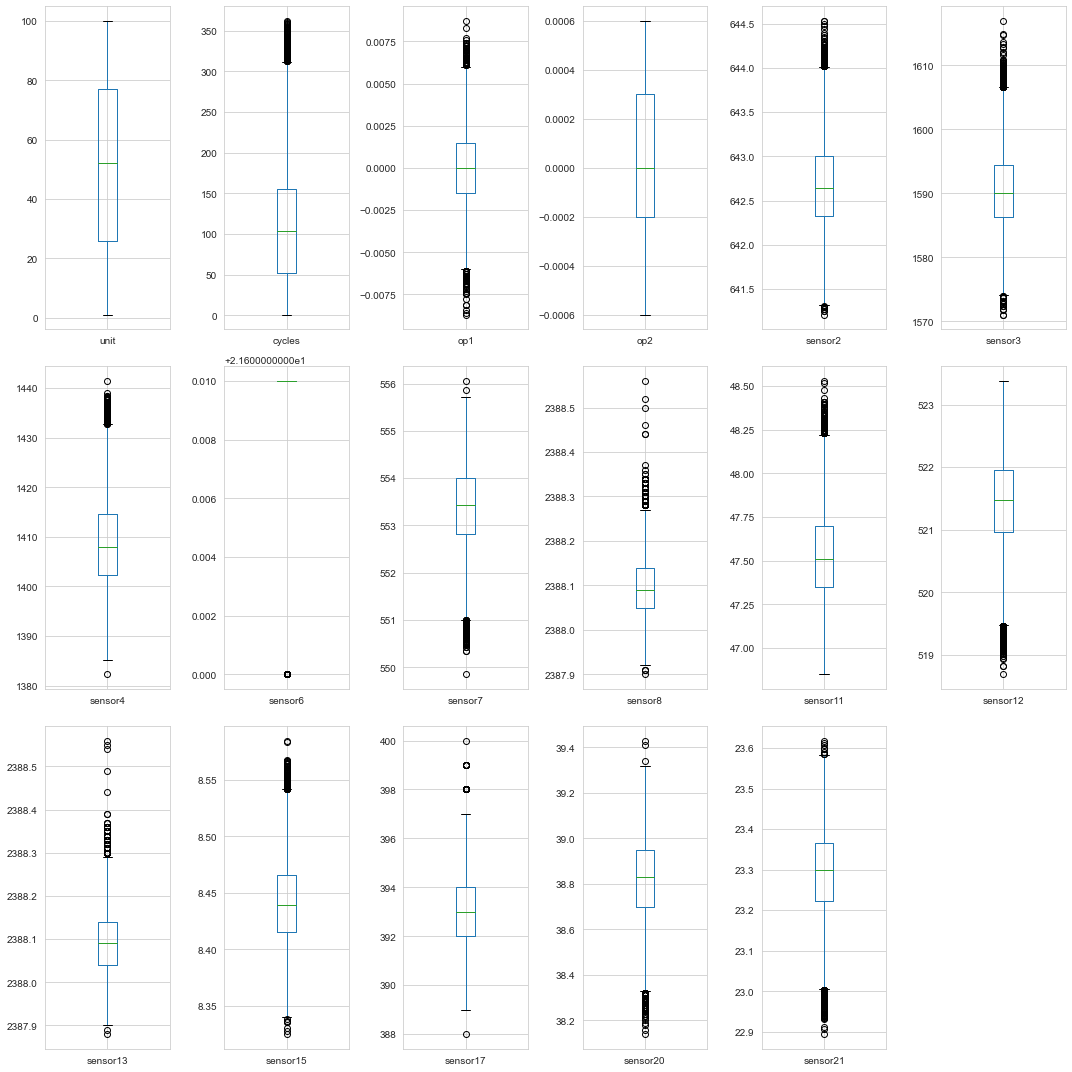

In [26]:
# Checking if there are any outliers in variables
fig, ax = plt.subplots(3,6, figsize=(15, 15))

for i,el in enumerate(list(train1.columns.values)):
    a = train1.boxplot(el, ax=ax.flatten()[i])
    
ax.flat[-1].set_visible(False)
plt.tight_layout() 

plt.show()

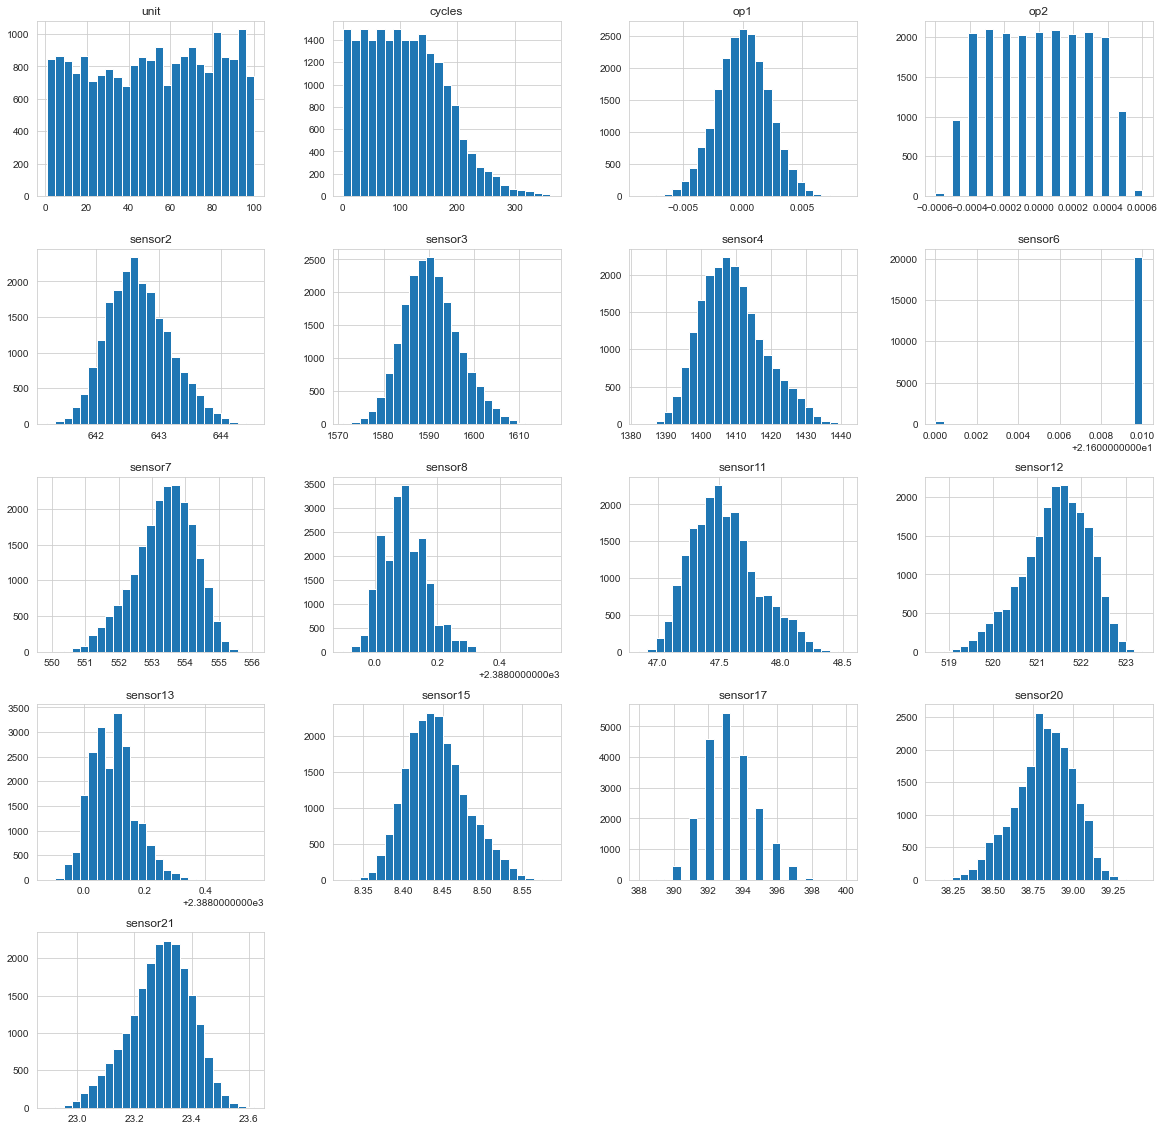

In [27]:
# To have a better look to see skewness in data
train1.hist(bins = 25, figsize=(20,20))
plt.show()

In [28]:
## will scale data before running random forest to handle the skewed data

In [29]:
# Dropping sensor6 as it doesn't have any correlation to RUL and that it barely has any activity
train1 = train1.drop(columns = train1[['sensor6']])
test1 = test1.drop(columns = test1[['sensor6']])
train_attributes = train_attributes.drop(columns = train_attributes[['sensor6']])
train_sensors = train_sensors.drop(columns = train_sensors[['sensor6']])

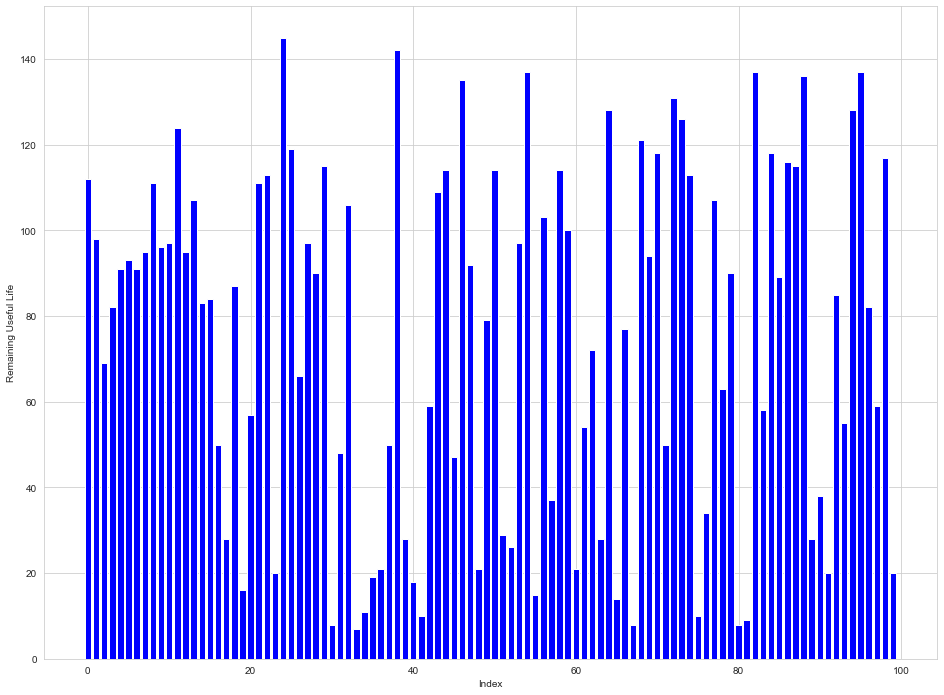

In [30]:
plt.figure(figsize = (16,12))
plt.bar(RUL1.index.values, RUL1['RUL'], color = 'blue')
plt.xlabel("Index")
plt.ylabel("Remaining Useful Life")
plt.show()

# There is large variation in the remaining life throughout the units

<AxesSubplot:xlabel='RUL', ylabel='Density'>

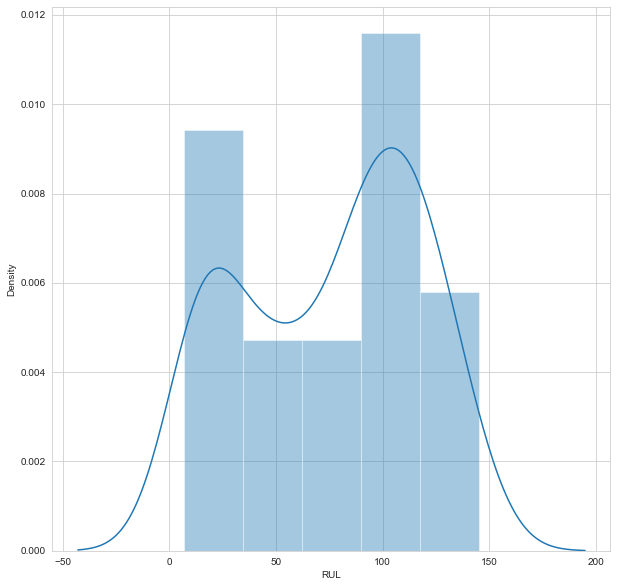

In [31]:
plt.figure(figsize = (10,10))
sns.distplot(RUL1["RUL"])

# Bimodal variation

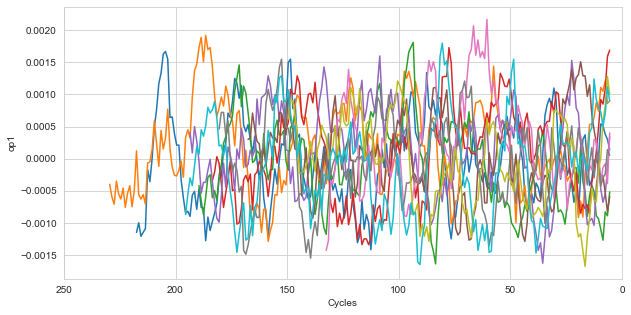

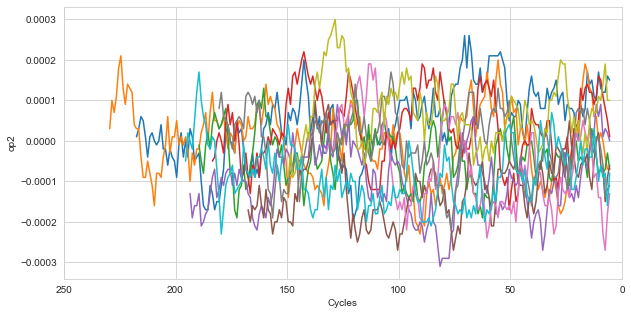

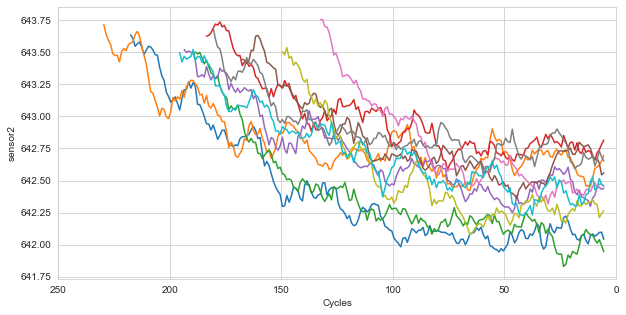

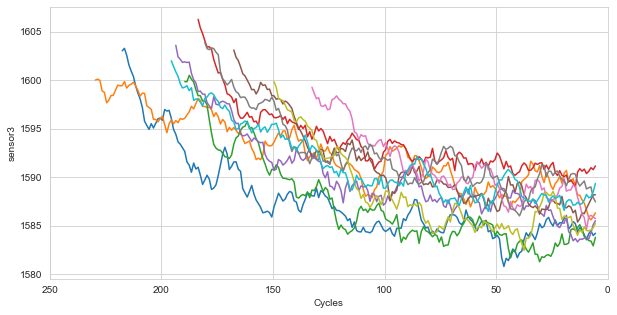

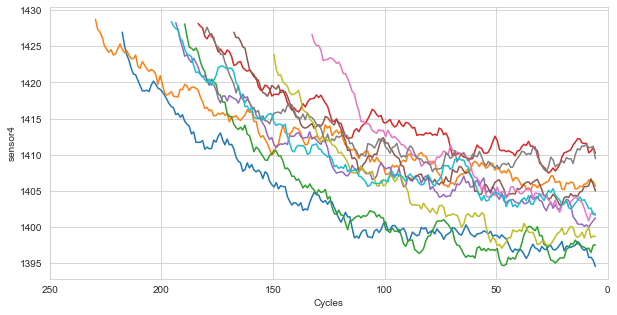

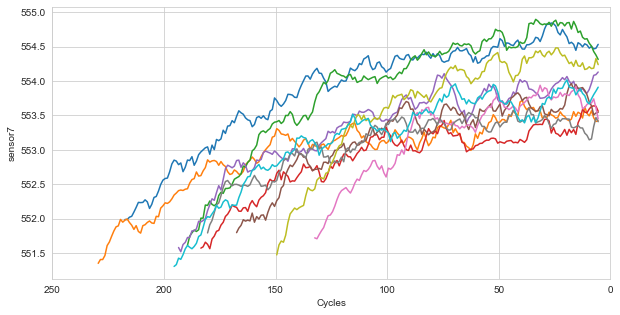

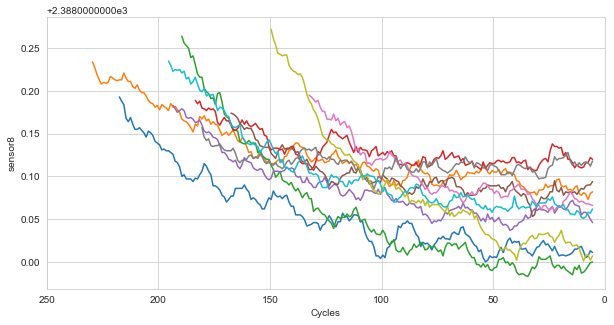

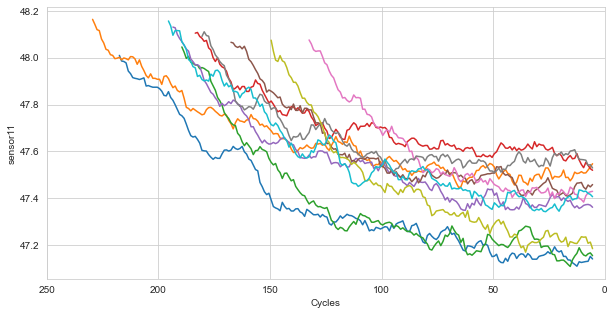

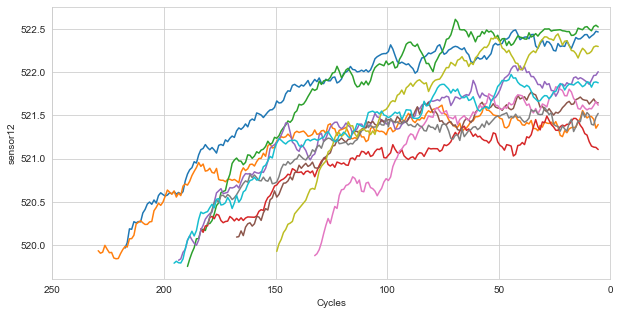

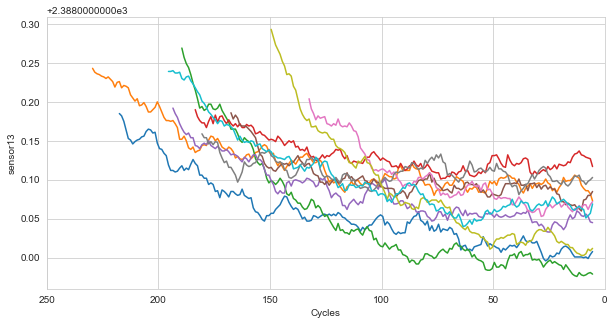

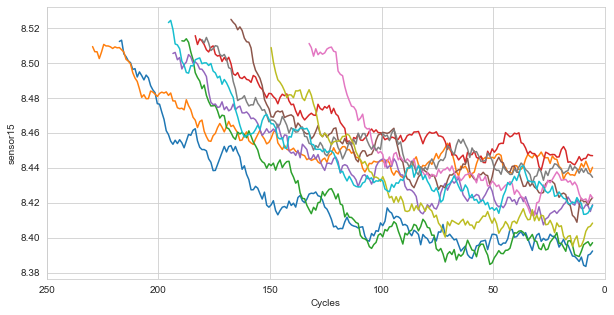

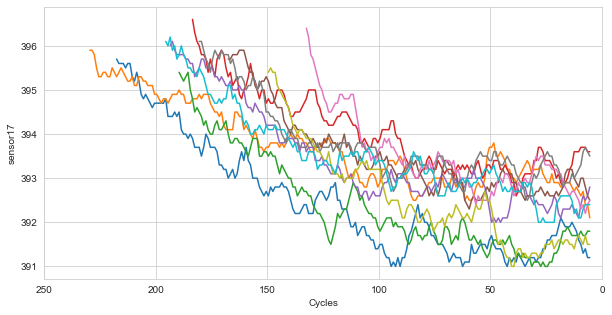

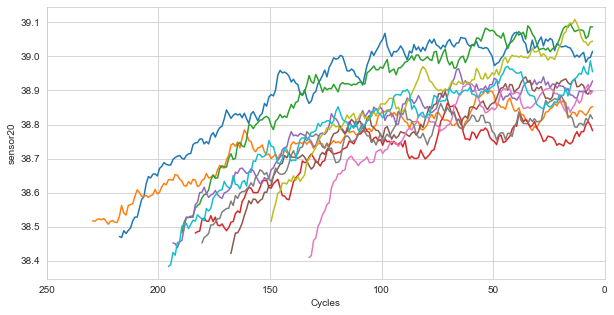

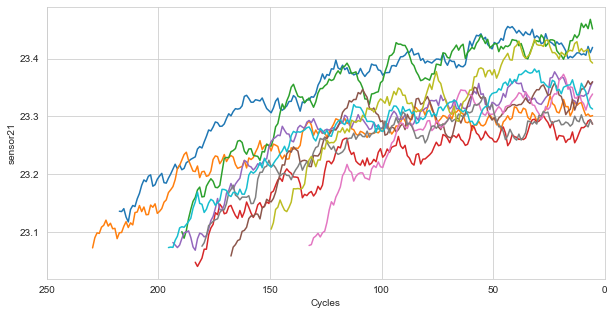

In [32]:
# Looking at individual sensor activity for differnt units
for x in train_attributes.columns:
    plt.figure(figsize = (10,5))
    for i in train1["unit"].unique():
        if (i % 10 == 0):  # Make visualization easier to see by reducing number of units being plotted
            plt.plot("cycles", x, data = train1[train1["unit"] == i].rolling(10).mean())
    plt.xlim(250,0)
    plt.xlabel("Cycles")
    plt.ylabel(x)
    plt.show()
    
# Most(not all) attributes follow a similar patterns

### Modeling

In [33]:
train = pd.merge(train1, RUL1, on='unit')
train

,unit,cycles,op1,op2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,112
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,112
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,112
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,112
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,643.49,1597.98,1428.63,551.43,2388.19,48.07,519.49,2388.26,8.4956,397,38.49,22.9735,20
20627,100,197,-0.0016,-0.0005,643.54,1604.50,1433.58,550.86,2388.23,48.04,519.68,2388.22,8.5139,395,38.30,23.1594,20
20628,100,198,0.0004,0.0000,643.42,1602.46,1428.18,550.94,2388.24,48.09,520.01,2388.24,8.5646,398,38.44,22.9333,20
20629,100,199,-0.0011,0.0003,643.23,1605.26,1426.53,550.68,2388.25,48.39,519.67,2388.23,8.5389,395,38.29,23.0640,20


In [34]:
x = train.drop('RUL', axis=1)
y = train.RUL

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [35]:
sc = StandardScaler()
sc.fit(X_train)

X_train_sc = sc.transform(X_train)
X_train_sc = pd.DataFrame(X_train_sc, columns=X_train.columns)

X_test_sc = sc.transform(X_test)
X_test_sc = pd.DataFrame(X_test_sc, columns=X_test.columns)

X_train = X_train_sc
X_test = X_test_sc

In [36]:
from sklearn.ensemble import RandomForestClassifier

randomForestModel = RandomForestClassifier(random_state = 21)

In [58]:
randomForestModel.fit(X_train, Y_train)
model_train_pred = randomForestModel.predict(X_train)
model_rf_pred = randomForestModel.predict(X_test)
print(model_rf_pred)

[121  95  92 ... 118 121 109]


In [38]:
rfmodel_pred = pd.DataFrame(model_rf_pred)
rfmodel_pred = rfmodel_pred.rename(columns = {0:'Predict_RF'})

In [39]:
Y_test = Y_test.reset_index()
Y_test = Y_test.drop('index', axis = 1)

In [40]:
df_model_results = pd.concat([X_test, Y_test], axis = 1 )
df_model_results = df_model_results.reset_index()
model_results = pd.concat([df_model_results, rfmodel_pred], axis = 1 )
model_results

,index,unit,cycles,op1,op2,sensor2,sensor3,sensor4,sensor7,sensor8,sensor11,sensor12,sensor13,sensor15,sensor17,sensor20,sensor21,RUL,Predict_RF
0,0,0.595996,1.702345,-0.950413,1.696627,-0.828809,-0.895800,-0.072998,-0.340538,-0.375840,0.100642,-0.086267,0.326122,-0.532746,-0.789213,1.291659,-0.211947,121,121
1,1,-1.484377,0.555558,-0.129709,-0.010212,1.488811,2.443182,1.355623,-1.841528,2.976629,2.185442,-2.073020,2.671572,1.299339,1.143359,-1.243062,-2.077146,95,95
2,2,-0.120198,-1.389624,0.007076,-0.692948,-0.808829,-0.518845,-1.572386,0.968596,-1.074271,-1.984159,1.021990,-0.915587,-0.987444,-2.077594,0.795735,0.897588,92,92
3,3,0.084429,2.137834,-0.403277,-1.034315,2.228052,1.825754,2.678093,-2.247811,0.881336,2.259899,-2.478480,0.740025,2.312437,1.143359,-2.841038,-2.197868,97,97
4,4,1.516817,0.700721,-0.175303,0.331156,-0.189465,1.010100,-0.745290,0.833169,0.322591,-0.830073,0.265132,0.464090,-0.912991,-0.789213,0.134504,0.324389,137,137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6185,6185,1.653235,-0.794456,-1.999092,-0.692948,-0.728911,-0.453852,-0.532987,1.499021,-0.236154,-1.388501,-0.126813,-0.777619,-0.016891,-0.145022,0.410017,0.783317,20,20
6186,6186,0.493682,1.339438,-1.725524,1.355259,2.387888,2.779517,2.249064,-2.067240,1.859139,2.408814,-2.735271,2.119701,2.543774,1.787550,-2.400217,-1.357423,14,14
6187,6187,0.937041,0.395879,0.417428,0.331156,-0.309342,1.591782,-0.265397,0.212459,-0.655213,-0.308873,-0.626880,0.188154,0.323468,-0.789213,0.905941,0.436817,63,118
6188,6188,0.595996,-0.547680,0.143860,-0.010212,-0.389260,0.282186,-1.270518,0.765455,-0.655213,-1.462959,0.967929,-0.639652,0.791460,-1.433404,0.850838,0.579656,121,121


In [41]:
# Creating a dataframe to compare our true and predicted RUL values
RUL_compare = model_results[['RUL','Predict_RF']]
RUL_compare['Difference'] = RUL_compare['Predict_RF'] - RUL_compare['RUL']
RUL_compare.sample(20)

,RUL,Predict_RF,Difference
183,8,28,20
4667,91,91,0
169,28,28,0
3167,90,34,-56
4251,93,93,0
1823,117,117,0
3446,20,20,0
3346,116,116,0
2973,111,111,0
3552,126,118,-8


In [42]:
# Dataframe showing the distribution of how many predictions were accurate
pd.DataFrame({'Predictions': [(RUL_compare['Difference'] < 0).sum(), (RUL_compare['Difference'] == 0).sum(), (RUL_compare['Difference'] > 0).sum()]}, columns = ['Predictions'], index = ['Negative', 'Zero', 'Positive'])

,Predictions
Negative,582
Zero,5071
Positive,537


In [43]:
# Sort features based on importance towards predicting RUL
Importance = pd.DataFrame({'Importance':randomForestModel.feature_importances_*100}, index=X_train.columns)
display(Importance.sort_values('Importance', axis=0, ascending=False))

,Importance
unit,31.602534
cycles,8.433592
sensor4,4.949710
sensor12,4.823356
sensor7,4.758380
sensor15,4.702458
sensor21,4.682575
sensor3,4.642304
sensor11,4.560512
sensor2,4.469683


In [44]:
# Training accuracy
## Tried changing the parameters for random forest model but scores dropped too much
rf_accuracy_train = randomForestModel.score(X_train, Y_train)
print('Training Accuracy Score: {0:.4f}'.format(rf_accuracy_train))

Training Accuracy Score: 1.0000


In [45]:
# Testing accuracy
rf_accuracy = randomForestModel.score(X_test, Y_test)
print('Testing Accuracy Score: {0:.4f}'.format(rf_accuracy))

Testing Accuracy Score: 0.8192


In [46]:
print(classification_report(Y_test, model_rf_pred))

# The precision and recall scores aren't as high as we wanted
# But it also isn't too low and can do a decent job in predicting

              precision    recall  f1-score   support

           7       0.70      0.77      0.74        56
           8       0.68      0.83      0.74       209
           9       0.91      0.93      0.92        68
          10       0.72      0.73      0.73       126
          11       0.78      0.64      0.70        61
          14       0.87      0.97      0.92        64
          15       0.74      0.83      0.79        84
          16       0.99      0.96      0.97        81
          18       0.69      0.84      0.76        56
          19       0.85      0.92      0.89        38
          20       0.94      0.91      0.92       194
          21       0.60      0.91      0.73       186
          26       0.77      0.58      0.66        69
          28       0.78      0.76      0.77       250
          29       0.78      0.64      0.70        77
          34       0.76      0.67      0.71        39
          37       0.77      0.49      0.60        41
          38       1.00    

In [61]:
print('Training Metrics:')
print('R-Squared Value: ', r2_score(Y_train, model_train_pred))
print('MAE Value', mean_absolute_error(Y_train, model_train_pred))

Training Metrics:
R-Squared Value:  1.0
MAE Value 0.0


In [62]:
print('Testing Metrics:')
print('R-Squared Value: ', round(r2_score(Y_test, model_rf_pred),2))
print('MAE Value: ', round(mean_absolute_error(Y_test, model_rf_pred),2))

Testing Metrics:
R-Squared Value:  0.61
MAE Value:  9.17


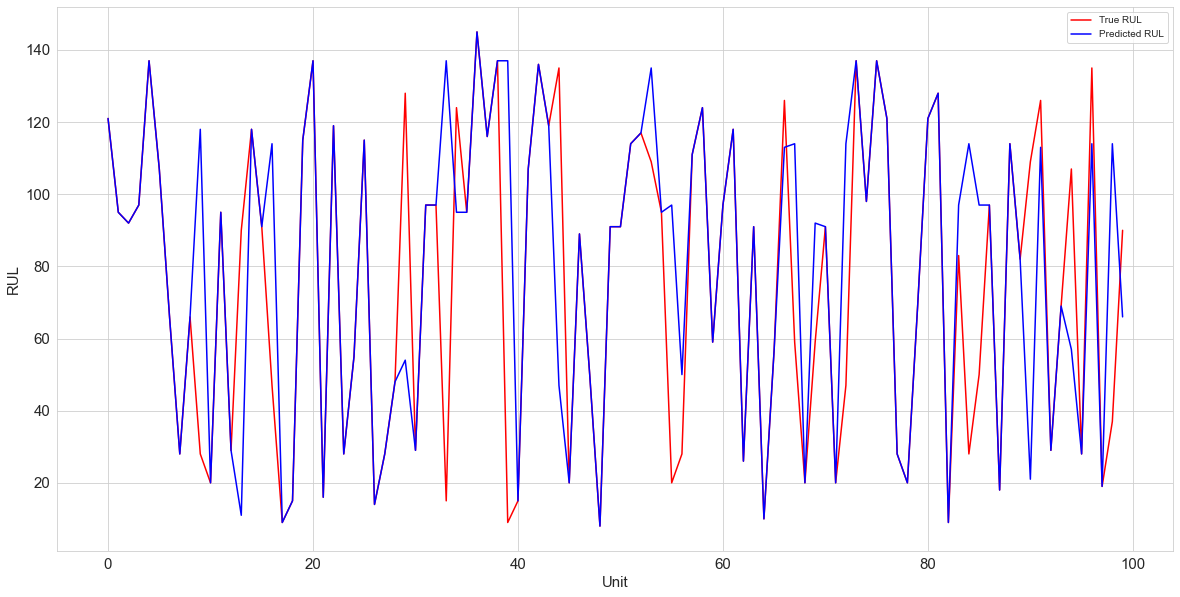

In [47]:
plt.figure(figsize = (20,10))
plt.plot(RUL_compare['RUL'][0:100], color='red')
plt.plot(RUL_compare['Predict_RF'][0:100], color='blue')
plt.xlabel('Unit', fontsize = 15)
plt.ylabel('RUL', fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(['True RUL','Predicted RUL'])

# There are many instances where true and predicted RUL overlap